# Project Final Report

#### EN.605.621.8VL.SU22 - Foundations of Algorithms

By Francisco Restrepo

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import networkx as nx
from itertools import count

__<u>NOTE:</u>__ In order to run NetworkX's PageRank implementation with no issues, make sure current NetworkX version running in the Jupyter Notebook is 2.6.3.

In [2]:
print(nx.__version__)

2.6.3


## The Algorithm That Saved the Internet

### Introduction

In the mid to late 1990s, the world was undergoing a dramatic transformation like no other in the history of humanity. This was right during the dot-com bubble, where there was massive amounts of capital finding its way into the hands of clever entrepreneurs who had brilliant internet startup ideas while at the same time others with not-so-clever ideas. This is the story of an algorithm that started Google Search and subsequently Alphabet, Inc. This is the story of the PageRank Algorithm.

PageRank was developed by Larry Page and Sergey Brin, in 1996 as part of their work at at Stanford University in Palo Alto, CA while pursuing their doctorate studies. This algorithm is what motivated the two famous billionaire founders of then Google, now Alphabet, Inc. in 1998. The reason I chose this algorithm was because of its sheer importance in our day-to-day lives and I was curious to learn the inner workings of this algorithm as much as I could. Aside from the importance that this algorithm has in our daily lives, I chose to analyze this algorithm because it presented a challenge and a new learning opportunity that is sometimes difficult to find outside of an academic environment. I was not too knowledgeable on the subject of graphs before starting this course due to me being a Petroleum Engineer so I wanted to learn more about this subject.<br>

The objective of this report is to analyze the PageRank algorithm both from a theoretical as well as from an empirical perspective. I will provide some quick background into the math that is necessary to understand the algorithm. The empirical time complexity will be measured by timing different runs of the PageRank algorithm for graphs of different sizes and plotting the results on a graph. This will be compared with the theoretical complexity, to see if there is a match and finally the results of the PageRank values of the script I write in this report will be validated against a library implementation of PageRank by NetworkX.<br>

As I will mention in the following section in more detail, PageRank algorithm is part of a family of graph algorithms called *centrality algorithms*. The actual implementation of this algorithm as you will see in the next section will feature the script and upon further observation you will see that this algorithm is iterative in nature. That is, this algorithm uses loops to repeat a series of steps to eventually reach a solutions to the given problem.<br>

## The Algorithm 

Page Rank is part of a family of algorithms who as a group are called centrality algorithms. More specifically, Page Rank is a variant of the Eigenvector Centrality algorithm. Centrality algorithms are one of the traditional categories of algorithms that operate on graphs. The main idea is that the algorithms that fall in this category can used to find the important nodes in a graph. Importance could mean different things, and the criteria for importance depends on which specific implementation/type of centrality algorithm is used.<br>

Some of the more popular use cases for Page Rank are the following:<br>
1. Ranking pages in terms of relevance in a Google search. Important pages receive a higher page rank and are more likely to appear at the top of search results.
2. Used by Twitter to present users with recommendations of other accounts that they may wish to follow.
3. Used in fraud detection applications.<br>

And many more. The Page Rank algorithm measures the importance of each node within a graph. It bases this importance on the number of incoming relationships and the importance of the corresponding source nodes. In the Google example, the most important pages are only as important as the number and importance of the pages that link to it. Page Rank's main objective is to solve the following equation:<br>

$$ PR(A) = (1 - d) + d(\dfrac{PR(T_1)}{C(T_1)} + \ldots + \dfrac{PR(T_n)}{C(T_n)}) $$

where,<br>

- We assume that a page $A$ has pages $T_1$ to $T_n$ which point to it.
- $d$ is a damping factor which can be set between $0$ (inclusive) and $1$ (exclusive). It is usually set to $0.85$.
- $C(A)$ is defined as the number of links going out of page $A$.$^1$<br>

### The Algorithm Script

The following is the python implementation for the PageRank algorithm which includes the theoretical complexity on every line:

In [3]:
# Declare global variable to keep tally of all node's PageRank values
global pageRank_total                                                                               # O(1)

def PageRank(graph, d, iteration):
    # Run PageRank algorithm for the specified number of iterations
    for i in range(iteration):                                                                      # O(k)
        pageRank_total = 0                                                                          # O(1)
        # Obtain PageRank value for each node in the graph
        for node in graph.nodes:                                                                    # O(V)
            # Get current node's predecessors
            predecessors = graph.pred[node]
            
            pagerank_sum = 0                                                                        # O(1)
            # Get the sum of all predecessor's PageRank values divided by their outdegree
            for pred in predecessors:                                                               # O(1)-O(V)
                # Obtain PageRank value of current predecessor
                pred_pr = graph.nodes[pred]['PageRank']                                             # O(1)
                # Obtain parent node outdegree
                pred_od = graph.out_degree(pred)                                                    # O(1)
                # Calculate summation
                pagerank_sum += pred_pr / pred_od                                                   # O(1)
            n = len(graph.nodes)                                                                    # O(1)
            random_jumping = d / n                                                                  # O(1)
            graph.nodes[node]['PageRank'] = random_jumping + (1 - d) * pagerank_sum                 # O(1)
            # Obtain PageRank value of current node
            node_pr = graph.nodes[node]['PageRank']                                                 # O(1)
            # Tally PageRank value of all nodes
            pageRank_total += node_pr                                                               # O(1)
            
    # Create dictionary to store PageRank values
    pageRank_dict = {}                                                                              # O(1)
    # Keeps index for adding items into dictionary
    index = 0                                                                                       # O(1)
    for node in graph.nodes:                                                                        # O(V)
        # Calculate normalized PageRank value
        pageRank_normalized = graph.nodes[node]['PageRank'] / pageRank_total                        # O(1)
        # Round the normalized PageRank value
        pageRank_normalized_round = round(pageRank_normalized, 5)                                   # O(1)
        # Add the rounded up normalized PageRank value to the dictionary
        pageRank_dict[index] = pageRank_normalized_round                                            # O(1)
        # Update PageRank value for current node with rounded normalized PageRank value
        graph.nodes[node]['PageRank'] = pageRank_normalized_round                                   # O(1)
        # Increase index dictionary
        index += 1                                                                                  # O(1)

    # Return the dictionary of PageRank values
    return pageRank_dict                                                                            # O(1)

### Canonical Test Data Generation

The function below builds a graph from raw data (i.e., a list):<br>

In [4]:
def init_graph(_edges):
    # Create a new DiGraph (directed graph) object in memory
    graph = nx.DiGraph()

    # Add nodes and edges to graph    
    graph.add_edges_from(_edges)
     
    # Initialize PageRank values for all nodes to 1
    for node in graph.nodes:
        graph.nodes[node]['PageRank'] = 1
         
    return graph

The following is the data that has been generated for performing canonical tests on the PageRank algorithm:

In [5]:
graph_1 = [(1,2), (2,3), (3,4), (4,5), (5,6)]

graph_2 = [(1,2), (2,3), (3,4), (4,5), (5,1)]

graph_3 = [(1,2), (2,1), (2,3), (3,2), (3,4), (4,3)]

graph_4 = [(1,2), (1,3), (1,4), (1,5), (1,7), (2,1), (3,1), (3,2), (4,2), (4,3), (4,5), (5,1), (5,3), (5,4), (5,6), (6,1), (6,5), (7,5)]

IBM = [(2076,4785), (2076,5793), (2076,6338), (2076,9484), (2076,2564), (2076,5793), (2076,6395), (2076,9484), (2076,9994), (5793,9484), (2076,2564), (2076,5793), (2076,6395), (2076,9994), (2076,9484), (2564,5793), (2564,6395), (2564,9994), (2076,2564), (2076,5793), (2076,6395), (2076,9484), (2076,9994), (2076,2564), (2076,5016), (2076,5793), (2076,6395), (2076,9484), (2076,9994), (2076,2564), (2076,5793), (2076,6395), (2076,9484), (2076,9994), (2076,2564), (2076,9484), (2076,9994)]

graph_1_alt = [(1,2), (2,3), (3,4), (4,5), (5,6), (6,1)]

graph_2_alt = [(1,2), (2,3), (3,4), (4,5), (5,1), (4,1)]

graph_3_alt = [(1,2), (2,1), (2,3), (3,2), (3,4), (4,3), (4,1)]

graph_5 = [('A', 'B'), ('A', 'C'), ('A', 'D'), ('A', 'E'), ('A', 'F')]

graph_6 = [('B', 'C'), ('C', 'D'), ('E', 'F'), ('F', 'G'), ('H', 'I'), ('I', 'J'), ('K', 'L'), ('L', 'M'), ('N', 'O'), ('O', 'P'), ('D', 'A'), ('G', 'A'), ('J', 'A'), ('M', 'A'), ('P', 'A')]

graph_7 = [('B', 'A'), ('C', 'A'), ('D', 'A'), ('E', 'A'), ('F', 'A')]

graph_8 = [('B', 'C'), ('C', 'D'), ('E', 'F'), ('F', 'G'), ('H', 'I'), ('I', 'J'), ('K', 'L'), ('L', 'M'), ('N', 'O'), ('O', 'P'), ('D', 'A'), ('G', 'A'), ('J', 'A'), ('M', 'A'), ('P', 'A'), ('A', 'Q')]

graph_9 = [('B', 'A'), ('C', 'A'), ('D', 'A'), ('E', 'A'), ('F', 'A'), ('A', 'G')]

graph_list = [graph_1, graph_2, graph_3, graph_4, IBM, graph_1_alt, graph_2_alt, graph_3_alt, graph_5, graph_6, graph_7, graph_8, graph_9]

### Canonical Test

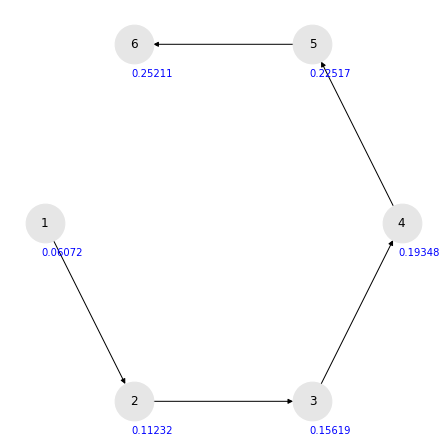

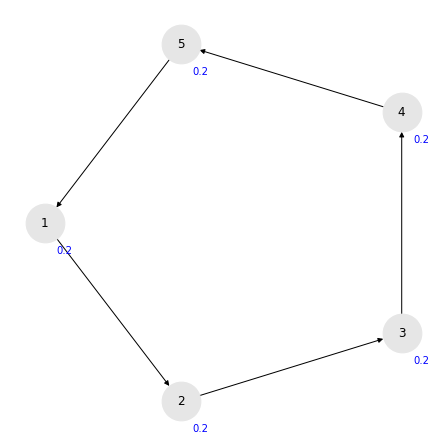

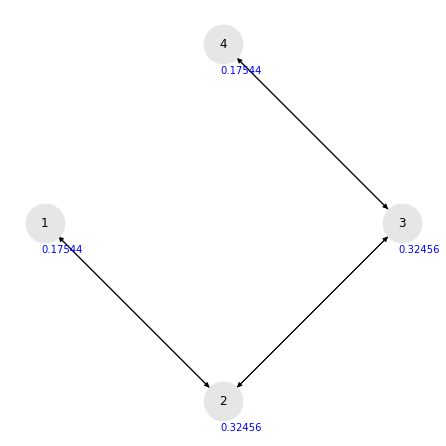

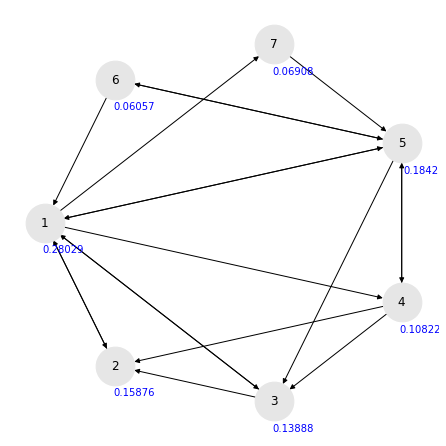

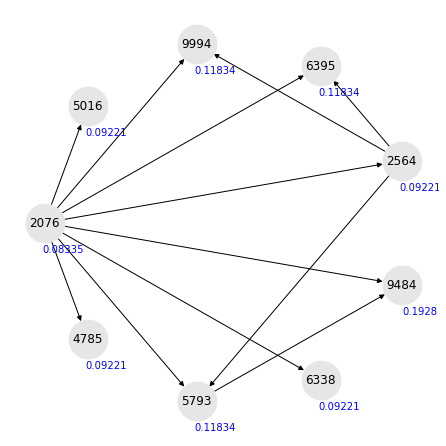

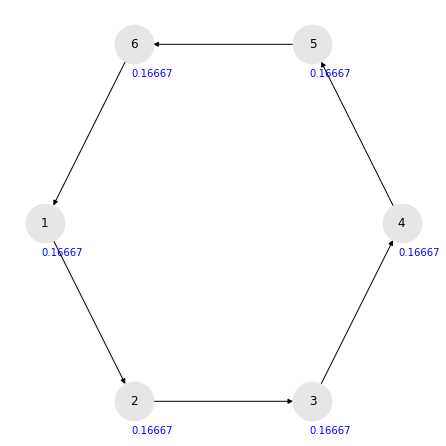

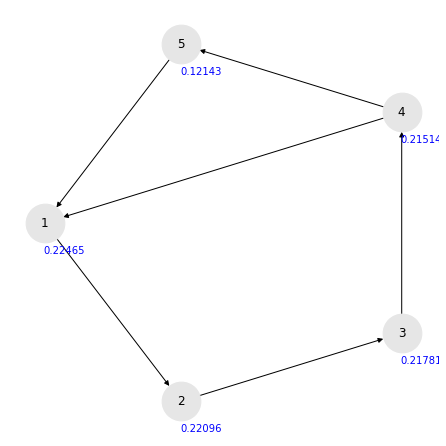

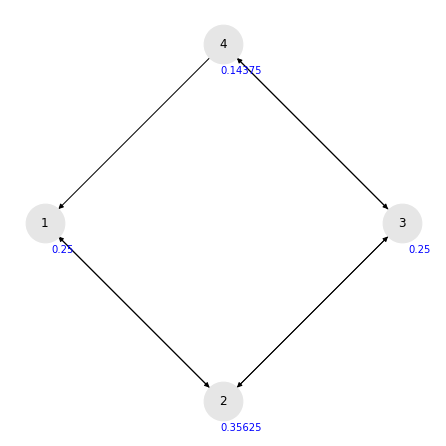

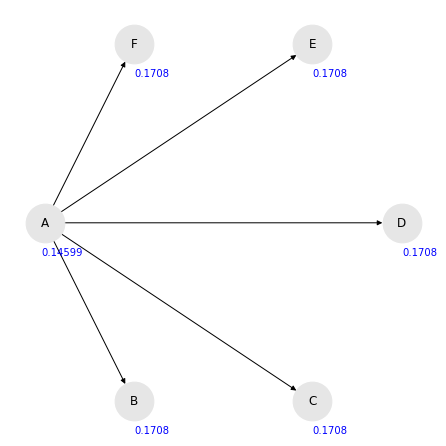

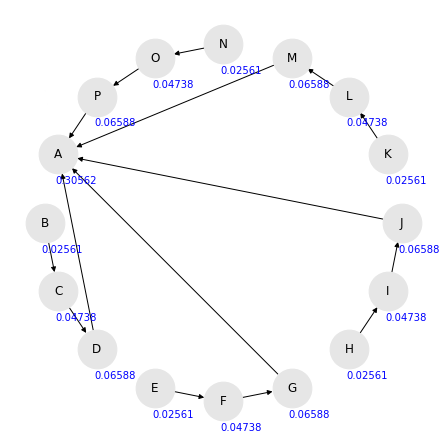

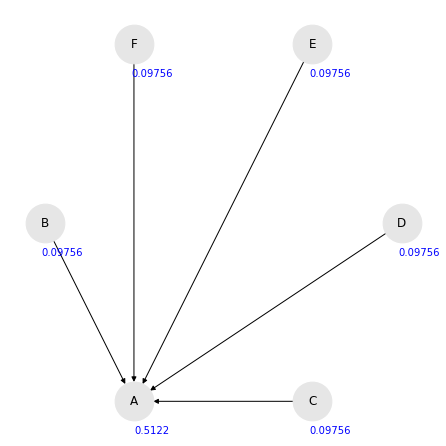

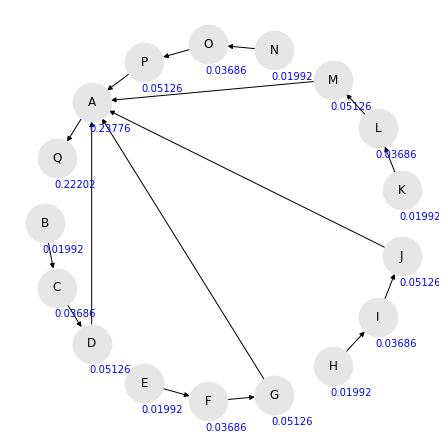

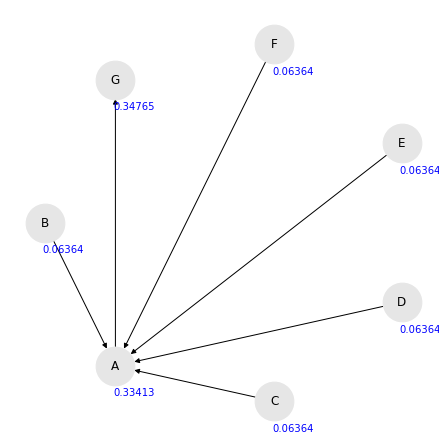

In [6]:
# Run PageRank for all the graphs above
for graphs in graph_list:
    plt.close()
    graph = init_graph(graphs)
    # Run the PageRank algorithm
    PageRank(graph, 0.15, 100)
    # Declare size of the graph drawing
    plt.figure(1,figsize=(6,6)) 
    # Obtain dictionary of node positions in the graph
    pos = nx.shell_layout(graph)
    node_labels = nx.get_node_attributes(graph, 'PageRank')
    # Draw digraph with PageRank values
    nx.draw(graph, pos, with_labels=True, font_color='black', node_color='0.9', node_size=1500)
    # Adjust position of each node label
    for key, value in pos.items():
        value = np.array([value[0] + 0.1, value[1] - 0.12])
        pos[key] = value
    nx.draw_networkx_labels(graph, pos, labels = node_labels, font_color='blue', font_size=10, horizontalalignment ='center',
                            verticalalignment='top')
    plt.show()

## Theoretical Analysis

In this section, a theoretical computational complexity analysis of the PageRank algorithm will be performed. We will start by evaluating the time complexity in the next subsection and proceed to evaluate the space complexity afterwards.<br>

### Time Complexity

Refer to The Algorithm Script section for a line-by-line demonstration of the algorithm's time complexity. In a jist, the algorithm operates in the following manner:<br>
- The outer loop runs $k$ times (the maximum number of iterations that must be performed).<br>
- The middle loop runs $V$ (number of vertices) times.<br>
- The inner loop could iterate in the _best-case_ a constant number of times or in the _worst-case_ $V$ times (in the case of a complete digraph). The _average-case_ of this loop really depends on if there is any change in the average degree of the nodes in the graph as the node size increases. For example, for a specific type of graph, if we hold the degree of each node relatively constant as the node size increases, then we can say that the inner loop for the average case for that specific type of graph iterates a constant number of times. However, if a complete graph or even a graph whose degree grows proportionally (if even by a fraction) as the node size increases, then we can make the approximation that in the average case, the inner loop will iterate proportionally with the number of nodes $V$.<br>

__Best case:__ $\mathcal{\Theta}(1) + \mathcal{\Theta}(k \cdot V) + \mathcal{\Theta}(V) = \mathcal{\Theta}(V)$.<br>

__Average case:__ $\mathcal{O}(V^2)$ because we are not assuming to have a complete graph but we could say a graph with half the number of edges as a complete graph, which would still be $\mathcal{O}(V^2)$.<br>

__Worst case:__ $\mathcal{\Theta}(1) + \mathcal{\Theta}(k \cdot V^2) + \mathcal{\Theta}(V) = \mathcal{\Theta}(V^2)$.

### Space Complexity

The space complexity for this algorithm is $\mathcal{\Theta}(V)$.

## Empirical Analysis

This section will consist of empirically testing the PageRank algorithm shown in the previous sections and a creating three relevant types of graphs using the NetworkX package in Python with different node sizes such as 100, 250, 500, 750, and 1000, and performing a time test of these. Counting will not be applied here. Counting is more accurate than time measurements when the speed of the algorithm is relatively fast and small data sets are given. For everything else, the time measurement to measure the algorithm's time complexity is good enough.<br>
Afterwards, the results of the PageRank algorithm implement on this report will be validated against NetworkX's PageRank implementation for accuracy and a time comparison as well.<br>

### Empirical Time Complexity

Before we start the empericial analysis, we first need to create different graph types of differening node sizes to test the PageRank algorithm with.<br>

In [7]:
# Create list to store number of nodes for input to PageRank
node_sizes = [100, 250, 500, 750, 1000]

# Declare length of list of number of nodes that will be provided as input to PageRank
node_sizes_length = len(node_sizes)

In [8]:
# Generate scale-free networks (graphs) of node sizes specified in the node_sizes list

# Declare an empty list of graphs based on the node sizes
graph_list_1 = [0] * node_sizes_length

for i in range(node_sizes_length):
    graph_list_1[i] = nx.scale_free_graph(node_sizes[i])

In [9]:
# Generate complete graphs of node sizes specified in the node_sizes list

# Declare an empty list of graphs based on the node sizes
graph_list_2 = [0] * node_sizes_length

for i in range(node_sizes_length):    
    graph_list_2[i] = nx.complete_graph(node_sizes[i])
    # Convert current undirected graph to directed
    graph_list_2[i] = graph_list_2[i].to_directed(as_view=False)

In [10]:
# Generate random (regular) graphs of node sizes specified in the node_sizes list

# Declare an empty list of graphs based on the node sizes
graph_list_3 = [0] * node_sizes_length

for i in range(node_sizes_length):    
    graph_list_3[i] = nx.random_regular_graph(2, node_sizes[i], seed=None)
    # Convert current undirected graph to directed
    graph_list_3[i] = graph_list_3[i].to_directed(as_view=False)

Now that we have the graphs we need, let's run our PageRank algorithm for each of the types of graphs and number of nodes and time them.<br>

In [11]:
%%time
# Above magic command is used to measure the total time used in this cell

from time import time

# Declare a list to hold the runtimes of the scale-free networks (graphs) of different node sizes
times_scale_free = [0] * node_sizes_length

# Create list to store PageRank values for all the scale-free networks (graphs) of different node sizes
pagerank_scale_free = [0] * node_sizes_length

for i in range(node_sizes_length):
    # Obtain current graph
    current_graph_1 = graph_list_1[i]
    
    # Initialize PageRank values for all nodes in current graph to 1
    for node in current_graph_1.nodes:
        current_graph_1.nodes[node]['PageRank'] = 1
    
    # Start measuring
    ts1 = time()
    
    # Run the PageRank algorithm
    pagerank_scale_free[i] = PageRank(current_graph_1, 0.15, 100)

    # End measuring
    times_scale_free[i] = time()-ts1

CPU times: total: 1.72 s
Wall time: 1.73 s


In [12]:
# Declare a list to hold the runtimes of the complete graphs of different node sizes
times_complete = [0] * node_sizes_length

# Create list to store PageRank values for all the complete graphs of different node sizes
pagerank_complete = [0] * node_sizes_length

for i in range(node_sizes_length):
    # Obtain current graph
    current_graph_2 = graph_list_2[i]
    
    # Initialize PageRank values for all nodes in current graph to 1
    for node in current_graph_2.nodes:
        current_graph_2.nodes[node]['PageRank'] = 1
    
    # Start measuring
    ts2 = time()
    
    # Run the PageRank algorithm
    pagerank_complete[i] = PageRank(current_graph_2, 0.15, 100)

    # End measuring
    times_complete[i] = time()-ts2

In [13]:
# Declare a list to hold the runtimes of the random regular graphs of different node sizes
times_random_regular = [0] * node_sizes_length

# Create list to store PageRank values for all the random regular graphs of different node sizes
pagerank_random_regular = [0] * node_sizes_length

for i in range(node_sizes_length):
    # Obtain current graph
    current_graph_3 = graph_list_3[i]
    
    # Initialize PageRank values for all nodes in current graph to 1
    for node in current_graph_3.nodes:
        current_graph_3.nodes[node]['PageRank'] = 1
    
    # Start measuring
    ts3 = time()
    
    # Run the PageRank algorithm
    pagerank_random_regular[i] = PageRank(current_graph_3, 0.15, 100)

    # End measuring
    times_random_regular[i] = time()-ts3

Let's plot our results now:<br>

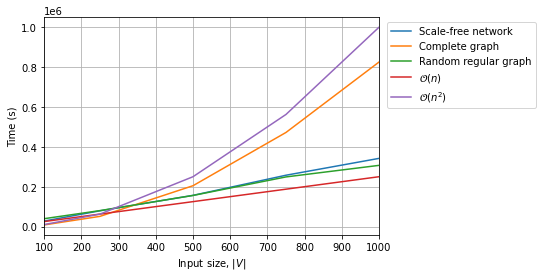

In [14]:
# Plot
df = pd.DataFrame({'Input size, $\|V|$':    node_sizes,
                   'Scale-free network':    [i*500000 for i in times_scale_free],
                   'Complete graph':        [i*5000 for i in times_complete],
                   'Random regular graph':  [i*500000 for i in times_random_regular],
                   '$\mathcal{O}(n)$':      [n*250 for n in node_sizes],
                   '$\mathcal{O}(n^2)$':    [(n**2) for n in node_sizes],
                  })
df.set_index('Input size, $\|V|$', drop=True, inplace=True)

fig = df.plot().get_figure()

plt.legend(bbox_to_anchor=(1.01, 1.0))

plt.ylabel('Time (s)')
plt.xlim([100, 1000])
plt.grid()

We can observe that our empirical results fall in line with what we were expecting when looking at the theoretical complexity of this specific PageRank implementation.<br>

Running the same graphs against the PageRank algorithm provided by the NetworkX package we get:<br>

In [15]:
# Declare a list to hold the runtimes of the complete graphs of different node sizes
times_networkx_complete = [0] * node_sizes_length

# Create list to store PageRank values for all the complete graphs of different node sizes
pagerank_networkx_complete = [0] * node_sizes_length

for i in range(node_sizes_length):
    # Obtain current graph
    current_graph_6 = graph_list_2[i]
    
    # Start measuring
    ts5 = time()
    
    # Run the PageRank algorithm
    pagerank_networkx_complete[i] = nx.pagerank(current_graph_6, alpha=0.15, max_iter=100)

    # End measuring
    times_networkx_complete[i] = time()-ts5

In [16]:
# Declare a list to store the runtimes of the scale-free network (graph) of different node sizes
times_networkx_scale_free = [0] * node_sizes_length

# Create list to store PageRank values for all the scale-free networks (graphs) of different node sizes
pagerank_networkx_scale_free = [0] * node_sizes_length

for i in range(node_sizes_length):
    # Obtain current graph
    current_graph_5 = graph_list_1[i]
    
    # Start measuring
    ts6 = time()
    
    # Run the PageRank algorithm
    pagerank_networkx_scale_free[i] = nx.pagerank(current_graph_5, alpha=0.15, max_iter=100)

    # End measuring
    times_networkx_scale_free[i] = time()-ts6

In [17]:
# Declare a list to hold the runtimes of the random regular graphs of different node sizes
times_networkx_random_regular = [0] * node_sizes_length

# Create list to store PageRank values for all the random regular graphs of different node sizes
pagerank_networkx_random_regular = [0] * node_sizes_length

for i in range(node_sizes_length):
    # Obtain current graph
    current_graph_7 = graph_list_3[i]
    
    # Start measuring
    ts7 = time()
    
    # Run the PageRank algorithm
    pagerank_networkx_random_regular[i] = nx.pagerank(current_graph_7, alpha=0.15, max_iter=100)

    # End measuring
    times_networkx_random_regular[i] = time()-ts7

Plotting the results and we get the following:<br>

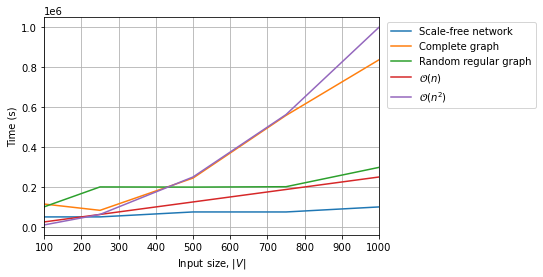

In [18]:
# Plot
df = pd.DataFrame({'Input size, $\|V|$':    node_sizes,
                   'Scale-free network':    [i*25000000 for i in times_networkx_scale_free],
                   'Complete graph':        [i*500000 for i in times_networkx_complete],
                   'Random regular graph':  [i*100000000 for i in times_networkx_random_regular],
                   '$\mathcal{O}(n)$':      [n*250 for n in node_sizes],
                   '$\mathcal{O}(n^2)$':    [(n**2) for n in node_sizes],
                  })
df.set_index('Input size, $\|V|$', drop=True, inplace=True)

fig = df.plot().get_figure()

plt.legend(bbox_to_anchor=(1.01, 1.0))

plt.ylabel('Time (s)')
plt.xlim([100, 1000])
plt.grid()

You can observe similar results compared to the previous plot. Although you can see that NetworkX's implementation of PageRank runs a lot faster than the implementation for this report. But, in general, the curves for each of the different graphs follows a similar pattern, which falls in line with what we expect.<br>

### Validation of the Results

In this section, we will compare our PageRank results from our script in this document vs. NetworkX's own implementation of the PageRank algorithm.<br>

For the purposes of this validation, we will use a graph that is small enough that we can display the results on a graph in this document. We will be using what is called Florentine Family Graph, which is a graph that shows all the influential families in the city of Florenece in the Italian peninsula during the rennaissance. This is a good graph to use because there is already data stating which should be the most significant nodes in the graph by previous studies and it is also interesting how PageRank behaves with other tyep of data.<br>

First we have to create our Florentine Family Graph:<br>

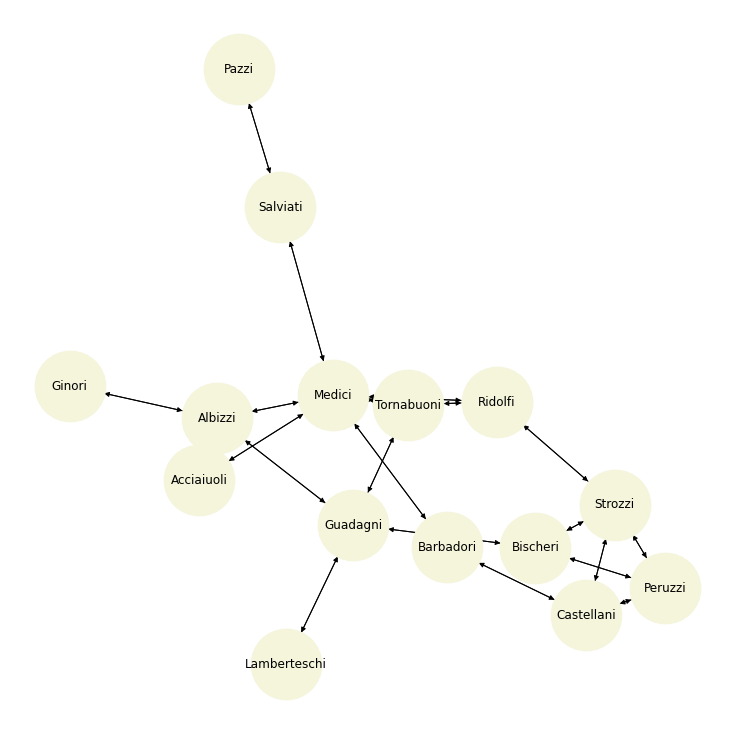

In [19]:
# Create Florentine Families Graph
florentine_families = nx.florentine_families_graph()

# Convert current undirected graph to directed
florentine_families = florentine_families.to_directed(as_view=False)

# Obtain the number of nodes in the florentine_families_graph
florentine_families_nodes = list(florentine_families.nodes)
florentine_families_length = len(florentine_families_nodes)

plt.figure(1,figsize=(10,10)) 
nx.draw(florentine_families, nx.spring_layout(florentine_families), with_labels=True,
        node_size=5000, font_color='black', node_color='beige', font_size=12)
plt.show()

We will then run the PageRank algorithm provided by NetworkX and our own implementation of PageRank on the Florentine Families graph above to compare our results.<br>

In [20]:
# Run the PageRank implementation from NetworkX
pagerank_networkx_florentine_families = nx.pagerank(florentine_families, alpha=0.15, max_iter=100)

# Round up the PageRank values
for key, value in pagerank_networkx_florentine_families.items():
    pagerank_networkx_florentine_families[key] = round(value, 3)
    
# Add PageRank values as attributes for all nodes in the graph
for node in florentine_families.nodes:
    florentine_families.nodes[node]['PageRank'] = pagerank_networkx_florentine_families.get(node)

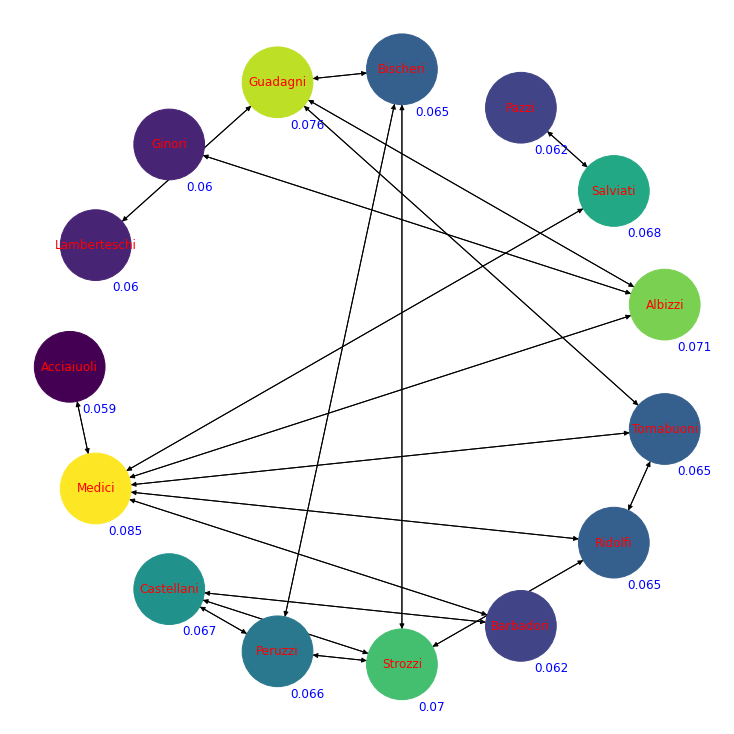

In [21]:
# Draw the graph with PageRank values generated from the PageRank implementation from NetworkX

# get unique groups
groups = set(nx.get_node_attributes(florentine_families,'PageRank').values())
mapping = dict(zip(sorted(groups),count()))
nodes = florentine_families.nodes()
colors = [mapping[nodes[n]['PageRank']] for n in nodes]

# drawing nodes and edges separately so we can capture collection for colobar
pos = nx.shell_layout(florentine_families)
nc = nx.draw_networkx_nodes(florentine_families, pos, nodelist=nodes, node_color=colors, node_size=0)
plt.close()
# Declare size of the graph drawing
plt.figure(1,figsize=(10,10))
# Obtain dictionary of node positions in the graph
node_labels_florentine = nx.get_node_attributes(florentine_families, 'PageRank')
nx.draw(florentine_families, pos, with_labels=True, node_size=5000, font_color='red', node_color=colors, font_size=12)
# Adjust position of each node label
for key, value in pos.items():
    value = np.array([value[0] + 0.1, value[1] - 0.12])
    pos[key] = value
nx.draw_networkx_labels(florentine_families, pos, labels = node_labels_florentine, font_color='blue',
                        horizontalalignment ='center', verticalalignment='top')
plt.axis('off')
plt.show()

Note that as the PageRank increases the color goes from dark purple to bright yellow.<br>

In [22]:
# Run the PageRank script from this document

# Create list to store PageRank values for all the random regular graphs of different node sizes
pagerank_florentine_families = [0] * florentine_families_length

# First, initialize PageRank values for all nodes in current graph to 1
for node in florentine_families.nodes:
    florentine_families.nodes[node]['PageRank'] = 1
    
# Run the PageRank algorithm
pagerank_florentine_families = PageRank(florentine_families, 0.15, 100)

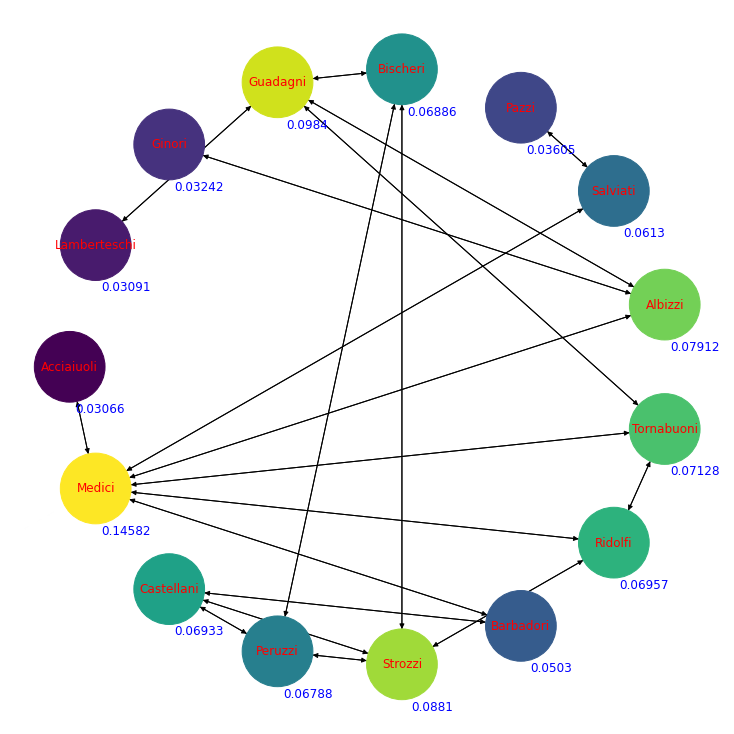

In [23]:
# Draw the graph with PageRank values generated from the PageRank script from this document

# get unique groups
groups = set(nx.get_node_attributes(florentine_families,'PageRank').values())
mapping = dict(zip(sorted(groups),count()))
nodes = florentine_families.nodes()
colors = [mapping[nodes[n]['PageRank']] for n in nodes]

# drawing nodes and edges separately so we can capture collection for colobar
pos = nx.shell_layout(florentine_families)
nc = nx.draw_networkx_nodes(florentine_families, pos, nodelist=nodes, node_color=colors, node_size=0)
plt.close()
# Declare size of the graph drawing
plt.figure(1,figsize=(10,10))
# Obtain dictionary of node positions in the graph
node_labels_florentine = nx.get_node_attributes(florentine_families, 'PageRank')
nx.draw(florentine_families, pos, with_labels=True, node_size=5000, font_color='red', node_color=colors, font_size=12)
# Adjust position of each node label
for key, value in pos.items():
    value = np.array([value[0] + 0.1, value[1] - 0.12])
    pos[key] = value
nx.draw_networkx_labels(florentine_families, pos, labels = node_labels_florentine, font_color='blue',
                        horizontalalignment ='center', verticalalignment='top')
plt.axis('off')
plt.show()

Now that we have validated our results with a small initial graph, let's validate the output from our implementation of PageRank against the output of NetworkX's PageRank implementation. We will do this by looking at the output generated from our canonical data and we will generate the graphs along with the PageRank values to validate our results.<br>

For our purposes, we will look at the output of a graph with 100 nodes since it is a large-enough graph to make the output interesting and also small enough that can be analyzed by inspection by the human eye. Let's draw our graph <br>

In [24]:
# Print the names of the columns.
print ("{:<40} {:<10}".format('MY SCRIPT', 'NETWORKX'))
print ("{:<10} {:<29} {:<10} {:<10}".format('NODE', 'PAGERANK', 'NODE', 'PAGERANK'))
 
# print each data item.
for i in range(len(pagerank_scale_free[0])):
    # Get key-value pair from PageRank script
    node_script = i
    pagerank_script = pagerank_scale_free[0].get(i)
    # Get key-value pair from NetworkX's PageRank
    node_networkx = i
    pagerank_networkx = round(pagerank_networkx_scale_free[0].get(i), 5)  
    # Print each data item
    print ("{:<10} {:<29} {:<10} {:<10}".format(node_script, pagerank_script, node_networkx, pagerank_networkx))

MY SCRIPT                                NETWORKX  
NODE       PAGERANK                      NODE       PAGERANK  
0          0.18836                       0          0.07061   
1          0.03981                       1          0.01401   
2          0.16347                       2          0.05013   
3          0.0048                        3          0.00864   
4          0.0048                        4          0.00864   
5          0.0048                        5          0.00864   
6          0.00786                       6          0.00907   
7          0.0048                        7          0.00864   
8          0.0048                        8          0.00864   
9          0.01642                       9          0.01142   
10         0.0048                        10         0.00864   
11         0.0048                        11         0.00864   
12         0.00582                       12         0.00896   
13         0.0048                        13         0.00864   
14 

As you can see from the results on this table, even though the PageRank values from the two different algorithms is different in magnitude, they follow the same pattern. You can observe that in all the instances of, for example, PageRank of 0.00864 on NetworkX's side, there is a PageRank value of 0.0048 on 'My Script's side. You can also observe that highest value node in my script, node $0$ is also the same node with the highest value PageRank on NetworkX's implementation, also node $0$. Similarly, the node with the second-highest PageRank value is the same for both: node $2$. You can see that this pattern will hold for the rest of the nodes, so we have confirmed that the PageRank values provided by my implementation are accurate. The reason for the difference in the two values probably arises from the fact that my PageRank implementation normalizes PageRank values at the end of all the iterations.<br>

## Conclusions

The PageRank algorithm was revolutionary in it's time and still, to this day, is the major driving force of one of the most valuable technology companies in one of—if not the—largest industry (in terms of market capitalization) in the history of humanity. It is revolutionary because a great portion of Google's revenue still comes from search. If something where to go wrong with Google search I would dare to say that not only Goggle, but humanity itself would come to a complete halt. Search engines have become, for better or worse, an integral part of our daily lives and something that is extremely useful to society that everyone takes for granted. I am sure that there is not one person in a developed country that does not depend on Google for daily tasks or queries in some way or another. I know I do. The PageRank algorithm is what enabled Google to become the great and influential company that we know today, and what made billionaires out of Larry Page and Sergey Brin, among others. PageRank made all of the internet accessible to the common person in a way that wasn't possible before. Before Google and most other important search engines, it was difficult to find relevant websites or webpages pertaining to the needs of a person. PageRank is beautiful in it's power yet also in it's simplicity. It is incredible how in a few lines of code, the internet can be ranked and indexed in such an important way.<br>
I have learned quite a lot while working on this project. The first thing that comes to mind is that I knew nothing about PageRank before coming into this class, and upon first hearing about this algorithm I could not help but be intimidated by my perception of it's complexity. This perceived complexity and relevancy to today's digital world is what drew me to challenge myself and take this project on. Throughout my journey, I have learned that even though this algorithm seems to be simple enough, it's the details that get you. Before reciving the incoming data into the algorithm, you have to prepare the graph such that it is acceptable to be processed by the algorithm. For example, it is recommended in some cases to remove the dangling nodes if there is an excessive number of this in the graph since these nodes can produce less than optimal results if the iterations are left to run to completion. The graphs that are generated by the many libraries in the NetworkX package do not have key attributes such as a PageRank attribute in which to store a certain page's PageRank value. These are things that must be preprocessed beforehand before feeding the data to the algorithm.<br>
Another key thing that I learned was that my initial implementation of PageRank was very slow. I was not able to run the algorithm for full/complete graph with a large number of nodes, otherwise my computer would crash. This was one of the main pitfalls and one of the greatest difficulties I was facing on this project. I was finally able to fix the issue. What I did in order to fix the slowness of my algorithm was taking a command out where I forcing the conversion of an iterator object that is returned when I called a method to get a certain node's predecessor nodes. I figured that the list() method was slowing down the whole algorithm and making some graph calculations too slow and lead my computer to crash numerous times. I found a more elegant way to obtain the node's predecessors without having to force creating a list out of an iterator object, which made a tremendous difference in time savings. I also learned that for most types of graphs that are not complete graphs, the run time of PageRank is fast, on the order of $\mathcal{O}(n)$.<br>
Apart from my learnings from PageRank, I learned how to use the NetworkX package to a very compenent level. I learned how to create and display different types of graphs, with different patterns, labels, edge thicknesses, node sizes, and colors. I wouls have never have had the opportunity to learn something like this if I had not taken on this project as a personal challenge to learn. I have also learned to create and manipulate not only graphs using NetworkX, but other more fundamental data structures provided by Python like dictionaries that I wasn't as used to using in Java.
Overall, I am very happy with what I have learned in this project and I am certain that the learnings that I have obtained will serve me very well in my future CS classes and in academia and/or industry.<br>

## References

1. Page, Lawrence, et al. The PageRank citation ranking: Bringing order to the web. Stanford InfoLab, 1999.<br>
2. “PageRank.” NEO4J, https://neo4j.com/docs/graph-data-science/current/algorithms/page-rank/. Accessed 7 June 2022.<br>